## 데이터 시각화

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 작업 경로 확인 및 변경

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/PythonAdvanced/basic_review'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 작업 경로에 있는 폴더명과 파일명을 출력합니다.
sorted(os.listdir())

['Seafood_Trade_Prep.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price.z',
 'Used_Cars_Price_Prep.z']

### 실습 데이터셋 준비

In [5]:
# 압축 파일을 호출합니다.
# [힌트] joblib.load() 함수를 사용하세요.
# [참고] 두 데이터프레임을 원소로 갖는 리스트를 반환합니다.
joblib.load(filename = 'Seafood_Trade_Prep.z')

[        month nation    mpritm imxprt     weight     grand
 0      202101     대만   클로렐라 효모     수입     500.00    13.456
 1      202101     일본   클로렐라 효모     수입      84.00     1.326
 2      202101     미국   클로렐라 효모     수입       4.84     0.193
 3      202101    캐나다  스리루리나 효모     수입    1505.78    33.789
 4      202101     일본  스리루리나 효모     수입     665.28    17.319
 ...       ...    ...       ...    ...        ...       ...
 31517  202112     독일      미꾸라지     수입       1.00     0.242
 31518  202112     미국      미꾸라지     수출     371.00     6.209
 31519  202112     중국      미꾸라지     수입  643363.00  2593.251
 31520  202112     일본         돔     수입      52.80     2.249
 31521  202112     중국         돔     수출    1696.00     6.100
 
 [31522 rows x 6 columns],
        국가           수입          수출         무역수지     국민소득 국가등급
 0      일본   170243.592  634750.935   464507.343  42620.0  선진국
 1      미국   250113.606  394052.534   143938.928  70430.0  선진국
 2     프랑스    34315.325   66501.431    32186.106  43880.0  선진국

In [6]:
# 압축 파일을 호출하고 sfd, mgd에 할당합니다.
sfd, mgd = joblib.load(filename = 'Seafood_Trade_Prep.z')

In [7]:
# sfd의 정보를 확인합니다.
sfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31522 entries, 0 to 31521
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   31522 non-null  object 
 1   nation  31522 non-null  object 
 2   mpritm  28824 non-null  object 
 3   imxprt  31522 non-null  object 
 4   weight  31522 non-null  float64
 5   grand   31522 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [8]:
# sfd의 처음 5행을 출력합니다.
sfd.head()

,month,nation,mpritm,imxprt,weight,grand
0,202101,대만,클로렐라 효모,수입,500.00,13.456
1,202101,일본,클로렐라 효모,수입,84.00,1.326
2,202101,미국,클로렐라 효모,수입,4.84,0.193
3,202101,캐나다,스리루리나 효모,수입,1505.78,33.789
4,202101,일본,스리루리나 효모,수입,665.28,17.319


In [9]:
# mgd의 정보를 확인합니다.
mgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      165 non-null    object 
 1   수입      165 non-null    float64
 2   수출      165 non-null    float64
 3   무역수지    165 non-null    float64
 4   국민소득    137 non-null    float64
 5   국가등급    165 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.0+ KB


In [10]:
# mgd의 처음 5행을 출력합니다.
mgd.head()

,국가,수입,수출,무역수지,국민소득,국가등급
0,일본,170243.592,634750.935,464507.343,42620.0,선진국
1,미국,250113.606,394052.534,143938.928,70430.0,선진국
2,프랑스,34315.325,66501.431,32186.106,43880.0,선진국
3,이탈리아,25683.273,52960.489,27277.216,35710.0,선진국
4,독일,1263.392,27185.831,25922.439,51040.0,선진국


### 그래픽 파라미터 설정

In [11]:
# 그래픽 파라미터를 설정합니다.
plt.rc(group = 'font', family = 'Gowun Dodum', size = 8)
plt.rc(group = 'figure', figsize = (4, 4), dpi = 150)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### 히스토그램 시각화

In [12]:
# mgd의 국민소득에 대한 기술통계량을 확인합니다.
# [참고] 히스토그램을 그리기 전에 연속형 변수의 최솟값과 최댓값을 확인합니다.
mgd['국민소득'].describe()

count      137.000000
mean     15546.423358
std      20658.408477
min        450.000000
25%       2300.000000
50%       6130.000000
75%      17740.000000
max      90360.000000
Name: 국민소득, dtype: float64

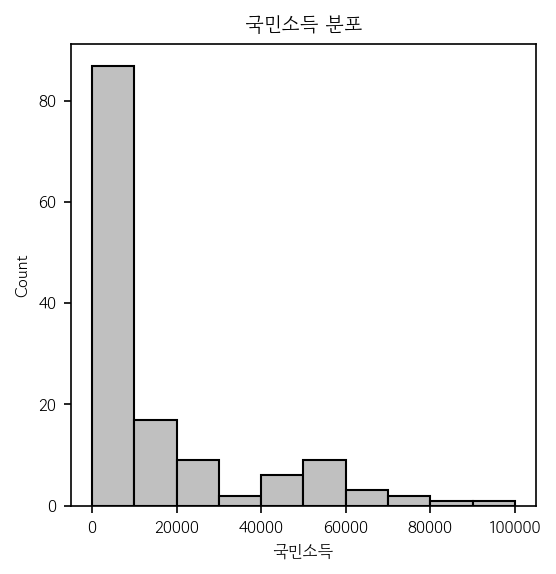

In [13]:
# mgd의 국민소득로 히스토그램을 그립니다.
# [힌트] sns.histplot() 함수를 사용하세요.
# [참고] binrange와 binwidth 매개변수를 추가하면 계급을 지정할 수 있습니다.
# [참고] fc(채우기색) 및 ec(테두리색) 매개변수를 추가하면 색을 지정할 수 있습니다.
sns.histplot(data = mgd, x = '국민소득', binrange = (0, 100000), binwidth = 10000,
             fc = 'silver', ec = 'black')

# 그래프 제목을 '국민소득 분포'로 지정합니다.
plt.title(label = '국민소득 분포');

### 국가별 수산물품목별 무역수지를 반환하는 함수 생성

In [14]:
# 국가명을 지정하면 수산물품목별 무역수지를 반환하는 함수를 생성합니다.
def getMpritmList(nation):
    
    # sfd에서 nation에 해당하는 행을 df에 할당합니다.
    df = sfd[sfd['nation'].eq(nation)]
    
    # df로 피벗 테이블을 생성하고 mpr에 할당합니다.
    mpr = pd.pivot_table(
        data = df, 
        values = 'grand', 
        index = 'mpritm', 
        columns = 'imxprt', 
        aggfunc = np.sum
    )
    
    # mpr에 있는 결측값을 0으로 대체하고 mpr에 재할당합니다.
    mpr = mpr.fillna(value = 0)
    
    # mpr의 행이름 네임을 '수산물'로 변경합니다.
    mpr.index.name = '수산물'
    
    # mpr의 열이름 네임을 삭제합니다.
    mpr.columns.name = None
    
    # mpr의 수출에서 수입을 뺀 무역수지를 생성합니다.
    mpr['무역수지'] = mpr['수출'] - mpr['수입']
    
    # mpr을 무역수지로 내림차순 정렬하고 mpr에 재할당합니다.
    mpr = mpr.sort_values(by = ['무역수지'], ascending = False)
    
    # mpr의 행이름을 초기화하고 mpr에 재할당합니다.
    mpr = mpr.reset_index()

    # 결과를 반환합니다.
    return mpr

In [15]:
# 일본의 수산물품목별 무역수지를 계산하고 mpr에 할당합니다.
mpr = getMpritmList(nation = '일본')

In [16]:
# mpr의 처음 10행을 출력합니다.
mpr.head(n = 10)

,수산물,수입,수출,무역수지
0,다랑어,1275.258,128950.909,127675.651
1,김,436.750,114139.670,113702.920
2,전복,36.525,42698.612,42662.087
3,붕장어,0.000,31125.801,31125.801
4,냉동한 것,501.435,22728.785,22227.350
5,붉은 대게살,62.880,21318.554,21255.674
6,황새치,402.789,19485.220,19082.431
7,바지락,0.000,17493.784,17493.784
8,전갱이,2.444,17431.010,17428.566
9,넙치,0.000,17113.017,17113.017


In [17]:
# mpr의 마지막 10행을 출력합니다.
mpr.tail(n = 10)

,수산물,수입,수출,무역수지
157,농어,2228.608,469.551,-1759.057
158,개아지살,3220.833,693.652,-2527.181
159,갈치,3618.230,253.127,-3365.103
160,포유동물,4056.177,0.000,-4056.177
161,가오리와 홍어,4621.557,0.000,-4621.557
162,명태,6158.574,100.207,-6058.367
163,우렁쉥이,7345.288,0.000,-7345.288
164,방어,36058.005,3505.671,-32552.334
165,돔,36402.686,21.139,-36381.547
166,가리비과,39305.985,13.476,-39292.509


### 막대그래프 그리기

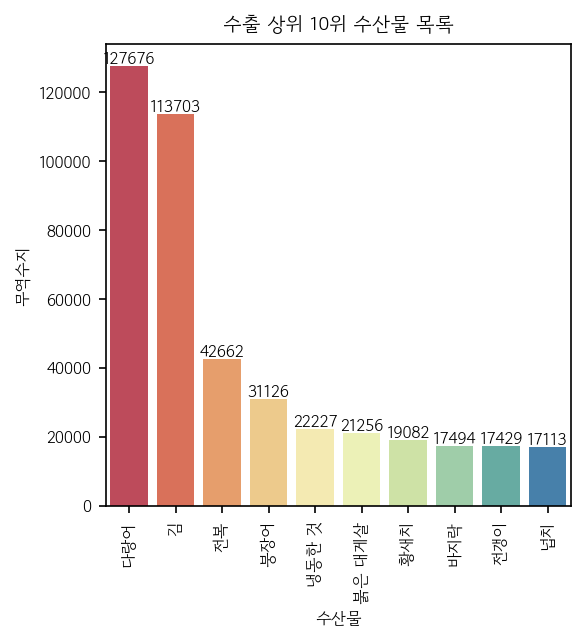

In [18]:
# mpr의 처음 10행을 top10에 할당합니다.
top10 = mpr.head(n = 10)

# top10으로 막대그래프를 그립니다
# [힌트] sns.barplot() 함수를 사용하세요.
# [참고] x 매개변수에 범주형, y 매개변수에 연속형 변수를 지정합니다.
sns.barplot(data = top10, x = '수산물', y = '무역수지', palette = 'Spectral')

# 그래프 제목을 '수출 상위 10위 수산물 목록'으로 지정합니다.
plt.title(label = '수출 상위 10위 수산물 목록')

# x축 눈금명을 90도 회전시킵니다.
plt.xticks(rotation = 90)

# 막대 위에 무역수지를 반올림하여 정수만 남긴 수를 텍스트로 추가합니다.
for i, v in enumerate(top10['무역수지']):
    plt.text(x = i, y = v, s = int(round(v, 0)), ha = 'center', va = 'bottom', fontsize = 8);

### 선 그래프 그리기

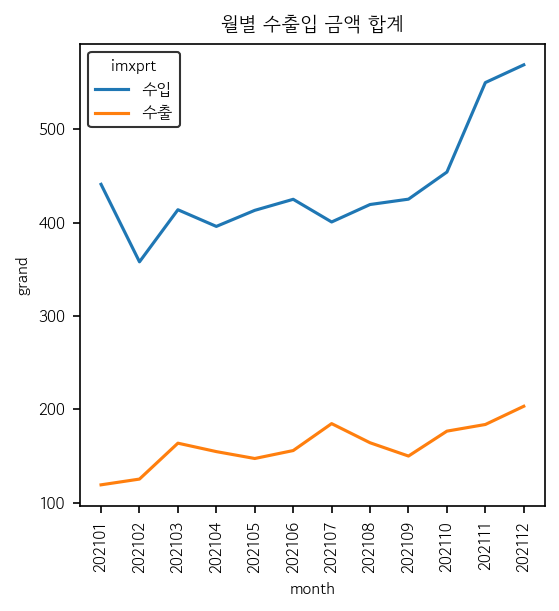

In [19]:
# sfd의 month별 수출/수입 합계를 선 그래프로 그립니다.
# [힌트] sns.lineplot() 함수를 사용하세요.
sns.lineplot(data = sfd, x = 'month', y = 'grand', hue = 'imxprt', errorbar = None)

# 그래프 제목을 '월별 수출입 금액 합계'로 지정합니다.
plt.title(label = '월별 수출입 금액 합계')

# x축 눈금명을 90도 회전시킵니다.
plt.xticks(rotation = 90);

### 산점도 그리기

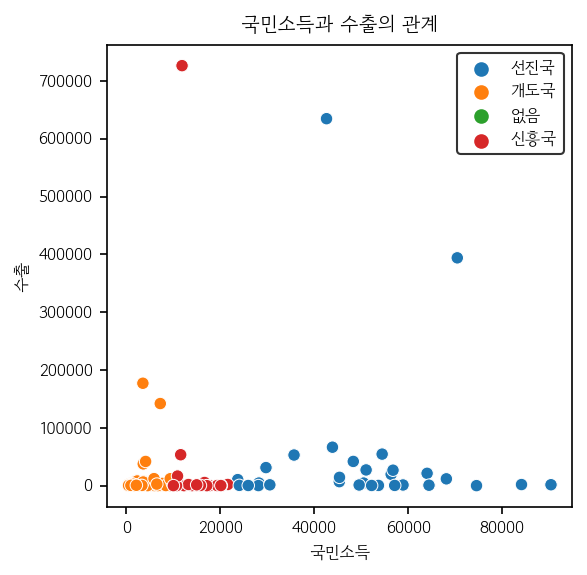

In [20]:
# mgd의 국민소득과 수출로 산점도를 그립니다.
# [힌트] sns.scatterplot() 함수를 사용하세요.
# [참고] hue 매개변수에 범주형 변수명을 지정하면 점의 채우기 색을 다르게 지정합니다.
# [참고] 점의 크기는 s 매개변수에 정수로 지정합니다.(기본값: 50)
sns.scatterplot(data = mgd, x = '국민소득', y = '수출', hue = '국가등급')

# 그래프 제목을 '국민소득과 수출의 관계'로 지정합니다.
plt.title(label = '국민소득과 수출의 관계')

# 범례의 위치를 오른쪽 위로 지정합니다.
plt.legend(loc = 'upper right');

## End of Document